## 6.3.2 一个简单的神经网络模型
&emsp;&emsp;Keras是TensorFlow 2.0的高阶API，可以只用几行代码就能方便快速地构建神经网络模型。Keras的核心数据结构是model（模型），用以组织网络层，其中Sequential模型（序贯模型）是最简单的模型，通过对Sequential模型进行简单的网络层线性堆叠，就可以构建出卷积神经网络（CNN）、循环神经网络（RNN）等复杂的神经网络模型。

&emsp;&emsp;利用Keras构建神经网络模型时，主要涉及的步骤为：载入数据、数据预处理、构建Sequential模型、利用compile函数进行编译、利用fit函数训练模型、模型的评估和对新数据的预测。

&emsp;&emsp;**例6-3-2** 利用Keras构建神经网络模型，对Fashion MNIST数据集进行分类。Fashion MNIST数据集由大小为28*28、分为10个类别的70000张灰色图像组成，其中60000张训练集图像，以及10000张测试集图像，类别标签与图像所表示的服装类别对应关系如表6-3-1所示。
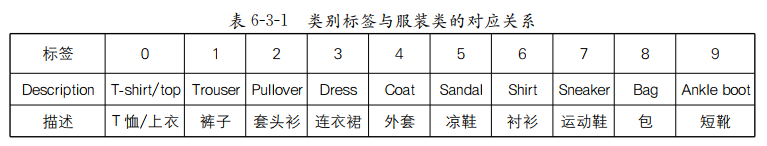

### 1. 分类Fashion MNIST数据集的简单版


&emsp;&emsp;利用Keras构建神经网络模型分类Fashion MNIST数据集的简单版程序如下:


#### （1）导入TensorFlow

&emsp;&emsp;通过import导入TensorFlow库，由于Keras已经集成到TensorFlow 2.0里，此处就不需要再额外导入Keras库。

In [1]:
import tensorflow as tf

####  （2）载入Fashion-MNIST数据集
&emsp;&emsp;Keras提供了常用的7个数据集：Fashion-MNIST、CIFAR10、CIFAR100、MNIST、boston_housing、IMDB、Reuters，利用类似的方法可以载入相关数据集，调用格式如下：
<center>(X_train, y_train), (X_test, y_test) = tf.keras.datasets.datasets_name.load_data()</center>
&emsp;&emsp;其中，X_train和y_train分别代表训练集的特征和标签，X_test和y_test分别代表测试集的特征和标签。

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### （3）利用reshape函数转换数字图像
&emsp;&emsp;图像的尺寸为28*28,为了进行后续模型训练，本步利用reshape函数将二维图像（28*28）数据转换为一维向量（784）。

In [3]:
X_train_reshape = X_train.reshape(X_train.shape[0], 28*28)
X_test_reshape = X_test.reshape(X_test.shape[0], 28*28)

#### （4）归一化数字图像
&emsp;&emsp;由图6-3-6可知，T恤/上衣的的像素值分布范围是0~255，可以简单的通过同除以255来实现归一化。

In [4]:
X_train_norm, X_test_norm = X_train_reshape / 255.0, X_test_reshape / 255.0

#### （5）构建Sequential模型
&emsp;&emsp;本步利用Sequential模型简单地线性堆叠网络层来构建神经网络模型。<br>
&emsp;&emsp;该神经网络的模型图如图所示：
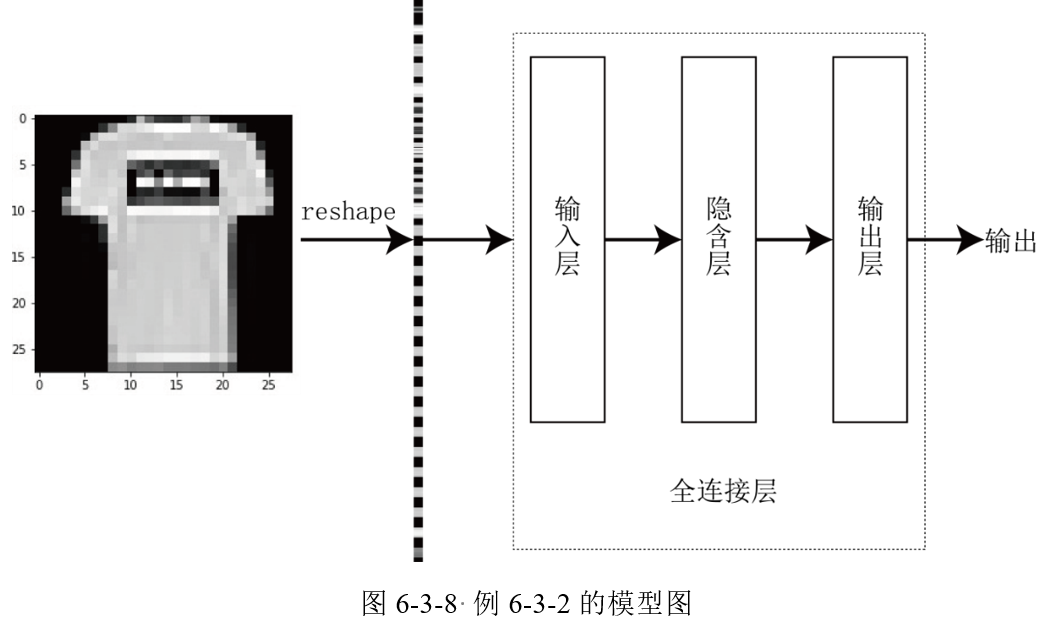

&emsp;&emsp;Hidden层参数数目计算方法：输入层的神经元为784，隐藏层神经元个数为50，其中隐藏层的每个神经元还包括一个偏差项（bias），因此隐藏层参数总数目为：<br>
&emsp;&emsp;Hidden_Param=784*50+50=39250<br>
&emsp;&emsp;Output层参数数目计算方法：隐藏层神经元为50，输出层神经元个数为10，包含10个偏差项，所以由隐藏层全连接到输出层的权重参数数目为50*10=500，总参数数目为：<br>
&emsp;&emsp;Output_Param=50*10+10=510<br>
&emsp;&emsp;所以Total params和Trainable params参数总数目为Hidden_Param和Output_Param之和：<br>
&emsp;&emsp;39250+39250=39760

In [5]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Dense(50,input_dim=28*28,activation='relu',name='Hidden'),
   tf.keras.layers.Dense(10,activation='softmax',name='Output')
])

#### （6）模型编译
该段代码主要利用model.compile()函数实现模型的编译，在构建模型完成之后，必须对模型进行编译之后才可以训练模型。相关参数解释如下：
* optimizer='adam'：表示使用adam作为模型的优化器，可以让模型快速收敛并提高准确率；
* loss='sparse_categorical_crossentropy'：表示使用crossentropy（交叉熵）作为损失函数；
* metrics=['accuracy']：表示使用准确率来评价模型。

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### （7）模型训练
&emsp;&emsp;模型编译后，利用model.fit()函数训练模型，其格式如下所示：
&emsp;&emsp;model.fit(X_train_norm, y_train, epochs=10, batch_size=None, verbose=1, validation_split=0.0)<br>
&emsp;&emsp;相关参数解释如下：
* X_train_norm：表示经标准化之后训练集特征；
* y_train；表示训练集类别标签；
* epochs=10：表示需要执行的训练周期数；
* batch_size：表示每批次的数据数目，若未指定，默认batch_size=32；
* verbose：表示显示日志的模式，0表示不输出日志信息，1表示输出包含进度条的日志信息，2表示每个训练周期(epoch)输出一条信息，默认为1。
* validation_split=0.0：表示训练样本用于验证数据集的比例，取值范围为0~1，该部分数据将不参与训练模型，而是用于验证训练后的模型，从而增强其泛化能力。

In [7]:
model.fit(X_train_norm, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6819 - accuracy: 0.7646
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4076 - accuracy: 0.8553
Epoch 3/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.3631 - accuracy: 0.8711
Epoch 4/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.3411 - accuracy: 0.8775
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3262 - accuracy: 0.8814
Epoch 6/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.3067 - accuracy: 0.8860
Epoch 7/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2979 - accuracy: 0.8912
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2899 - accuracy: 0.8923
Epoch 9/10
1875/1875 [==============================] - 2s 957us/step - loss: 0.2818 - accuracy: 0.8957
Epoch 10/10
1875/1875 [==============================] - 2s 975us/step -

#### （8）模型评估
&emsp;&emsp;模型训练后，使用测试集数据，利用model.evaluate()函数对模型进行评估，其格式如下所示：<br>
&emsp;&emsp;model.evaluate(X_test_norm, y_test, verbose=1)
* X_test_norm：表示经归一化的测试集图像；
* y_test：表示测试集类别标签；
* verbose：功能与代码段（7）中类似，0表示不显示，1、2表示显示。

In [8]:
model.evaluate(X_test_norm, y_test, verbose=1)

313/313 [==============================] - 0s 632us/step - loss: 0.3585 - accuracy: 0.8731


[0.35851234197616577, 0.8730999827384949]

#### （9）模型预测
&emsp;&emsp;模型训练好后，利用model.predict_classes()或者model.predict()函数进行预测。本步使用归一化后的测试集图像进行预测。

In [10]:
prediction=model.predict_classes(X_test_norm)

<br>

### 2. 分类Fashion MNIST数据集的完整版

&emsp;&emsp;经过对例6-3-2的学习，了解了分类Fashion MNIST数据集的基本流程。以下完整版程序是对简单版进行增强，使其更加完整和实用。完整版程序与简单版程序的主体基本一致，增加或修改的代码见深色底纹。利用Keras构建神经网络模型分类Fashion MNIST数据集的完整版程序如下。

#### （1）导入TensorFlow
&emsp;&emsp;通过import导入TensorFlow库，由于Keras已经集成到TensorFlow 2.0里，此处就不需要再额外导入Keras库。

In [1]:
#导入TensorFlow
import tensorflow as tf
import matplotlib.pyplot as plt

####  （2）载入Fashion-MNIST数据集
&emsp;&emsp;Keras提供了常用的7个数据集：Fashion-MNIST、CIFAR10、CIFAR100、MNIST、boston_housing、IMDB、Reuters，利用类似的方法可以载入相关数据集，调用格式如下：
<center>(X_train, y_train), (X_test, y_test) = tf.keras.datasets.datasets_name.load_data()</center>
&emsp;&emsp;其中，X_train和y_train分别代表训练集的特征和标签，X_test和y_test分别代表测试集的特征和标签。

In [2]:
#载入Fashion-MNIST数据集
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

&emsp;&emsp;在载入数据集之后，一般首先要对数据集进行探索，以便后续的数据处理和模型训练。补充如下相关知识。

* 显示训练集、测试集的结构信息

&emsp;&emsp;通过如下代码可对训练集、测试集的结构信息进行显示。

In [3]:
#查看训练集和测试集的形状
print('The shape of train data=',X_train.shape)     #完整版新增代码
print('The shape of y_train:',y_train.shape)        #完整版新增代码
print('The shape of test data=',X_test.shape)       #完整版新增代码
print('The shape of y_test:',y_test.shape)          #完整版新增代码

The shape of train data= (60000, 28, 28)
The shape of y_train: (60000,)
The shape of test data= (10000, 28, 28)
The shape of y_test: (10000,)


* 对图像与类别标签进行映射

&emsp;&emsp;通过如下代码，按表6-3-1规定，对图像与类别标签进行映射，以便后续绘图和预测。

In [4]:
#建立映射表
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

* 显示训练集的图像和相应的标签

&emsp;&emsp;结合上述映射表class_names，查看训练集的数据特征和标签，并找出图像与类别标签的对应关系。通过如下代码，显示训练集的前20个图像和相应的标签。

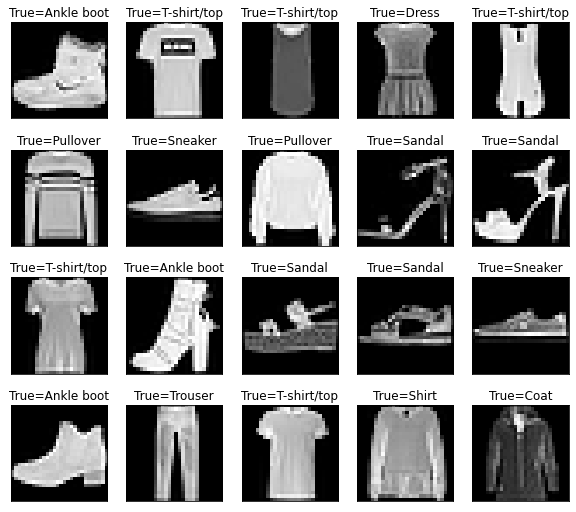

In [5]:
#显示训练集的前20个图像和标签
plt.figure(figsize=(10,9))                         #完整版新增代码
num=20                                             #完整版新增代码
for i in range(0, num):                            #完整版新增代码
    plt.subplot(4,5,i+1)                           #完整版新增代码
    plt.imshow(X_train[i], cmap='gray')            #完整版新增代码
    plt.xticks([])                                 #完整版新增代码
    plt.yticks([])                                 #完整版新增代码
    plt.title("True="+str(class_names[y_train[i]]))#完整版新增代码
plt.show()                                         #完整版新增代码

&emsp;&emsp;利用plt.subplot(nrows, ncols, index)函数进行子图绘制。其中，nrows，表示行数；ncols，表示列数；index表示索引值。比如本例的plt.subplot(4,5,i+1)表示绘制4行5列总共二十个子图的i+1个子图。

* 显示训练集的单幅图像和其表示的内容

&emsp;&emsp;通过如下代码，显示训练集的第2个图像和其表示的内容。

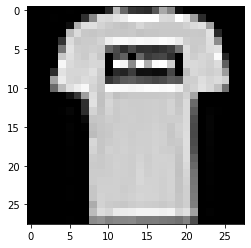

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [6]:
#显示训练集第二个图像及其内容                     #完整版新增代码
plt.figure()                                      #完整版新增代码
plt.imshow(X_train[1], cmap='gray')               #完整版新增代码
plt.show()                                        #完整版新增代码
print(X_train[1])                                 #完整版新增代码

#### （3）利用reshape函数转换数字图像
&emsp;&emsp;图像的尺寸为28*28,为了进行后续模型训练，本步利用reshape函数将二维图像（28*28）数据转换为一维向量（784）。

In [7]:
#利用reshape函数转换数字图像
X_train_reshape = X_train.reshape(X_train.shape[0], 28*28)
X_test_reshape = X_test.reshape(X_test.shape[0], 28*28)

* 显示reshape转换后数据信息

In [8]:
#查看经过reshape之后训练集和测试集的形状
print('The shape of train reshape data=',X_train_reshape.shape)         #完整版新增代码
print('The shape of y_train:',y_train.shape)                            #完整版新增代码
print('The shape of test reshape data=',X_test_reshape.shape)           #完整版新增代码
print('The shape of y_train:',y_test.shape)                             #完整版新增代码

The shape of train reshape data= (60000, 784)
The shape of y_train: (60000,)
The shape of test reshape data= (10000, 784)
The shape of y_train: (10000,)


#### （4）归一化数字图像
&emsp;&emsp;由图6-3-6可知，T恤/上衣的的像素值分布范围是0~255，可以简单的通过同除以255来实现归一化。

In [9]:
#标准化数字图像
X_train_norm, X_test_norm = X_train_reshape / 255.0, X_test_reshape / 255.0

#### （5）构建Sequential模型
* 通过model.add()构建Sequential模型

In [10]:
#构建Sequential模型
model = tf.keras.models.Sequential()                                                      #完整版新增代码
model.add(tf.keras.layers.Dense(50,input_dim=28*28,activation='relu',name='Hidden'))      #完整版新增代码
model.add(tf.keras.layers.Dense(10,activation='softmax',name='Output'))                   #完整版新增代码

&emsp;&emsp;①实例化一个Sequential模型，后续的网络层将通过model.add()来进行线性堆叠。

&emsp;&emsp;②利用model.add()函数，将“输入层”和“隐藏层”添加到模型中。相关参数解释如下：

* 50：表示“隐藏层”的神经元个数为50个；
* input_dim=28*28：表示“输入层”的神经元个数为28*28=784个，此时数字图像已经通过reshape函数将28*28的二维图像数据转换为784的一维向量；
* activation='relu'：表示该层的激活函数为relu函数；
* name='Hidden'：表示命名隐藏层为“Hidden”，方便后续的打印模型摘要。

&emsp;&emsp;③利用model.add()函数，将“输出层”添加到模型。相关参数解释如下：

* 10：表示“输出层”的神经元个数为10，因为Fashion-MNIST数据集分为10类，所以输出层的10个神经元对应0到9这10个类别；
* activation='softmax'：表示该层的激活函数为softmax函数，多分类问题我们一般采用softmax函数；
* name='Output'：表示命名输出层为“Output”，方便后续的打印模型摘要。

<br>

* 观察模型概况

&emsp;&emsp;模型构建完成之后，可以通过如下代码来打印模型概况。

In [11]:
#打印模型的概况
print(model.summary())                                                  #完整版新增代码

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 50)                39250     
_________________________________________________________________
Output (Dense)               (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
None


&emsp;&emsp;该神经网络的模型图如图所示：
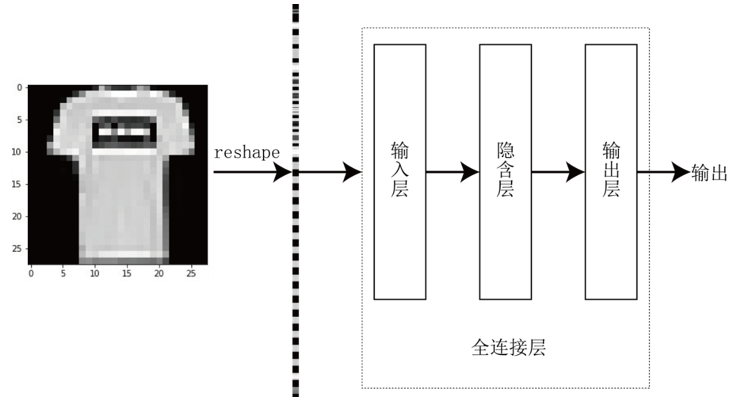

&emsp;&emsp;Hidden层参数数目计算方法：输入层的神经元为784，隐藏层神经元个数为50，其中隐藏层的每个神经元还包括一个偏差项（bias），因此隐藏层参数总数目为：<br>
&emsp;&emsp;Hidden_Param=784*50+50=39250<br>
&emsp;&emsp;Output层参数数目计算方法：隐藏层神经元为50，输出层神经元个数为10，包含10个偏差项，所以由隐藏层全连接到输出层的权重参数数目为50*10=500，总参数数目为：<br>
&emsp;&emsp;Output_Param=50*10+10=510<br>
&emsp;&emsp;所以Total params和Trainable params参数总数目为Hidden_Param和Output_Param之和：<br>
&emsp;&emsp;39250+39250=39760

#### （6）模型编译
该段代码主要利用model.compile()函数实现模型的编译，在构建模型完成之后，必须对模型进行编译之后才可以训练模型。相关参数解释如下：
* optimizer='adam'：表示使用adam作为模型的优化器，可以让模型快速收敛并提高准确率；
* loss='sparse_categorical_crossentropy'：表示使用crossentropy（交叉熵）作为损失函数；
* metrics=['accuracy']：表示使用准确率来评价模型。

In [12]:
#模型编译
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### （7）模型训练
&emsp;&emsp;模型编译后，利用model.fit()函数训练模型，其格式如下所示：
&emsp;&emsp;model.fit(X_train_norm, y_train, epochs=10, batch_size=None, verbose=1, validation_split=0.0)<br>
&emsp;&emsp;相关参数解释如下：
* X_train_norm：表示经标准化之后训练集特征；
* y_train；表示训练集类别标签；
* epochs=10：表示需要执行的训练周期数；
* batch_size：表示每批次的数据数目，若未指定，默认batch_size=32；
* verbose：表示显示日志的模式，0表示不输出日志信息，1表示输出包含进度条的日志信息，2表示每个训练周期(epoch)输出一条信息，默认为1。
* validation_split=0.0：表示训练样本用于验证数据集的比例，取值范围为0~1，该部分数据将不参与训练模型，而是用于验证训练后的模型，从而增强其泛化能力。

In [13]:
#模型训练 
model.fit(X_train_norm, y_train, epochs=10, verbose=1,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6961 - accuracy: 0.7628 - val_loss: 0.4457 - val_accuracy: 0.8432
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4154 - accuracy: 0.8521 - val_loss: 0.3733 - val_accuracy: 0.8632
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3645 - accuracy: 0.8708 - val_loss: 0.3620 - val_accuracy: 0.8675
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3427 - accuracy: 0.8766 - val_loss: 0.3651 - val_accuracy: 0.8750
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3219 - accuracy: 0.8829 - val_loss: 0.3442 - val_accuracy: 0.8763
Epoch 6/10
1688/1688 [==============================] - ETA: 0s - loss: 0.3112 - accuracy: 0.88 - 2s 1ms/step - loss: 0.3112 - accuracy: 0.8862 - val_loss: 0.3503 - val_accuracy: 0.8708
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2913 - accuracy:

#### （8）模型评估
&emsp;&emsp;模型训练后，使用测试集数据，利用model.evaluate()函数对模型进行评估，其格式如下所示：<br>
&emsp;&emsp;model.evaluate(X_test_norm, y_test, verbose=1)
* X_test_norm：表示经归一化的测试集图像；
* y_test：表示测试集类别标签；
* verbose：功能与代码段（7）中类似，0表示不显示，1、2表示显示。

In [14]:
#模型评估
model.evaluate(X_test_norm, y_test, verbose=1)

313/313 [==============================] - 0s 744us/step - loss: 0.3697 - accuracy: 0.8682


[0.3696540594100952, 0.8682000041007996]

#### （9）模型预测
&emsp;&emsp;模型训练好后，利用model.predict_classes()或者model.predict()函数进行预测。本步使用归一化后的测试集图像进行预测。

In [19]:
#模型预测
prediction=model.predict_classes(X_test_norm)

&emsp;&emsp;为了便于查看预测效果和保存模型，补充以下内容。

* 显示测试集的图像预测类别和真实类别。

&emsp;&emsp;通过如下代码显示测试集的前20个图像的预测类别和真实类别。

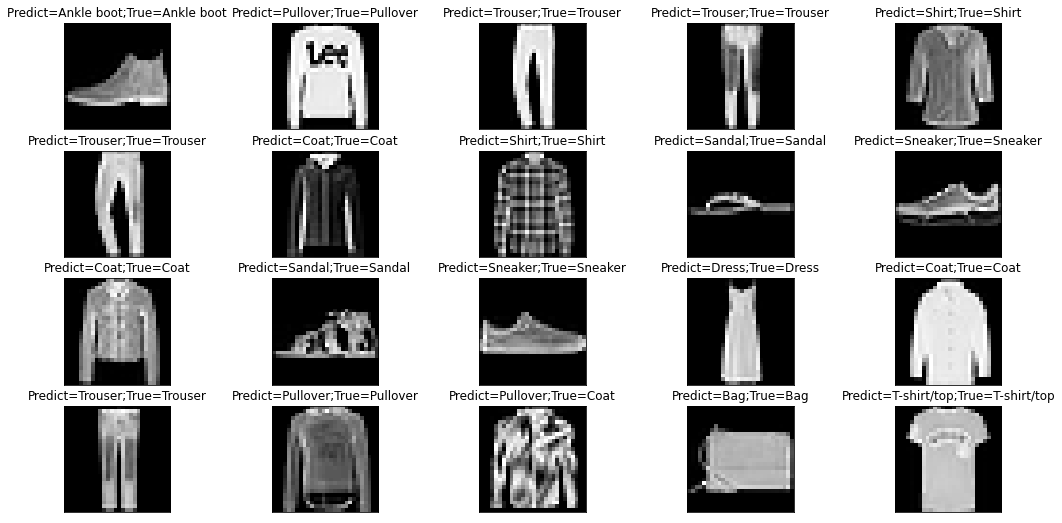

In [16]:
#显示测试集的前20个图像的预测类别和真实类别
plt.figure(figsize=(18,9))                                                                          #完整版新增代码
num=20                                                                                              #完整版新增代码
for i in range(0, num):                                                                             #完整版新增代码
    plt.subplot(4,5,i+1)                                                                            #完整版新增代码
    plt.imshow(X_test[i], cmap='gray')                                                              #完整版新增代码
    plt.xticks([])                                                                                  #完整版新增代码
    plt.yticks([])                                                                                  #完整版新增代码
    plt.title('Predict='+str(class_names[prediction[i]]) +';True=' + str(class_names[y_test[i]]))   #完整版新增代码
plt.show()                                                                                          #完整版新增代码

* 模型保存和记载

&emsp;&emsp;神经网络的模型训练完成，可以通过model.save()函数以.h5格式的模型文件进行保存。此外，还可通过tf.keras.models.load_model()函数加载已保存的模型文件，然后进行预测。示例代码如下。

In [17]:
#保存训练好的模型
modelname='my_model.h5'                            #完整版新增代码
model.save(modelname)                              #完整版新增代码
print('保存的模型名称 ',modelname)                 #完整版新增代码

保存的模型名称  my_model.h5


In [18]:
#利用保存的模型进行预测
model = tf.keras.models.load_model(modelname)      #完整版新增代码
prediction=model.predict_classes(X_test_norm)      #完整版新增代码